In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [151]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')
df

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0
...,...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,NaN
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,NaN
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,NaN
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,NaN


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [153]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [154]:
df.shape

(1061, 8)

In [155]:
df.dtypes

Brand                 object
Model                 object
Selling_Price          int64
Year                   int64
Seller_Type           object
Owner                 object
KM_Driven              int64
Ex_Showroom_Price    float64
dtype: object

In [156]:
df.describe().round(2)

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.00,1061.00,1061.00,626.00
mean,59638.15,2013.87,34359.83,87958.71
std,56304.29,4.30,51623.15,77496.59
min,5000.00,1988.00,350.00,30490.00
25%,28000.00,2011.00,13500.00,54852.00
50%,45000.00,2015.00,25000.00,72752.50
75%,70000.00,2017.00,43000.00,87031.50
max,760000.00,2020.00,880000.00,1278000.00


In [157]:
#printing the first 5 unique values of each column
for col in df.columns:
    print(col,":")
    print(df[col].unique()[:5])
    print(df[col].nunique(), '\n')

Brand :
['TVS' 'Bajaj' 'Yo' 'Honda' 'Mahindra']
20 

Model :
['TVS XL 100' 'Bajaj  ct 100' 'Yo Style' 'Bajaj Discover 100'
 'TVS Scooty Streak']
279 

Selling_Price :
[30000 18000 20000 25000 24999]
130 

Year :
[2017 2011 2010 2012 2015]
28 

Seller_Type :
['Individual' 'Dealer']
2 

Owner :
['1st owner' '2nd owner' '3rd owner' '4th owner']
4 

KM_Driven :
[ 8000 35000 10000 43000 85000]
304 

Ex_Showroom_Price :
[30490. 32000. 37675. 42859. 44140.]
230 



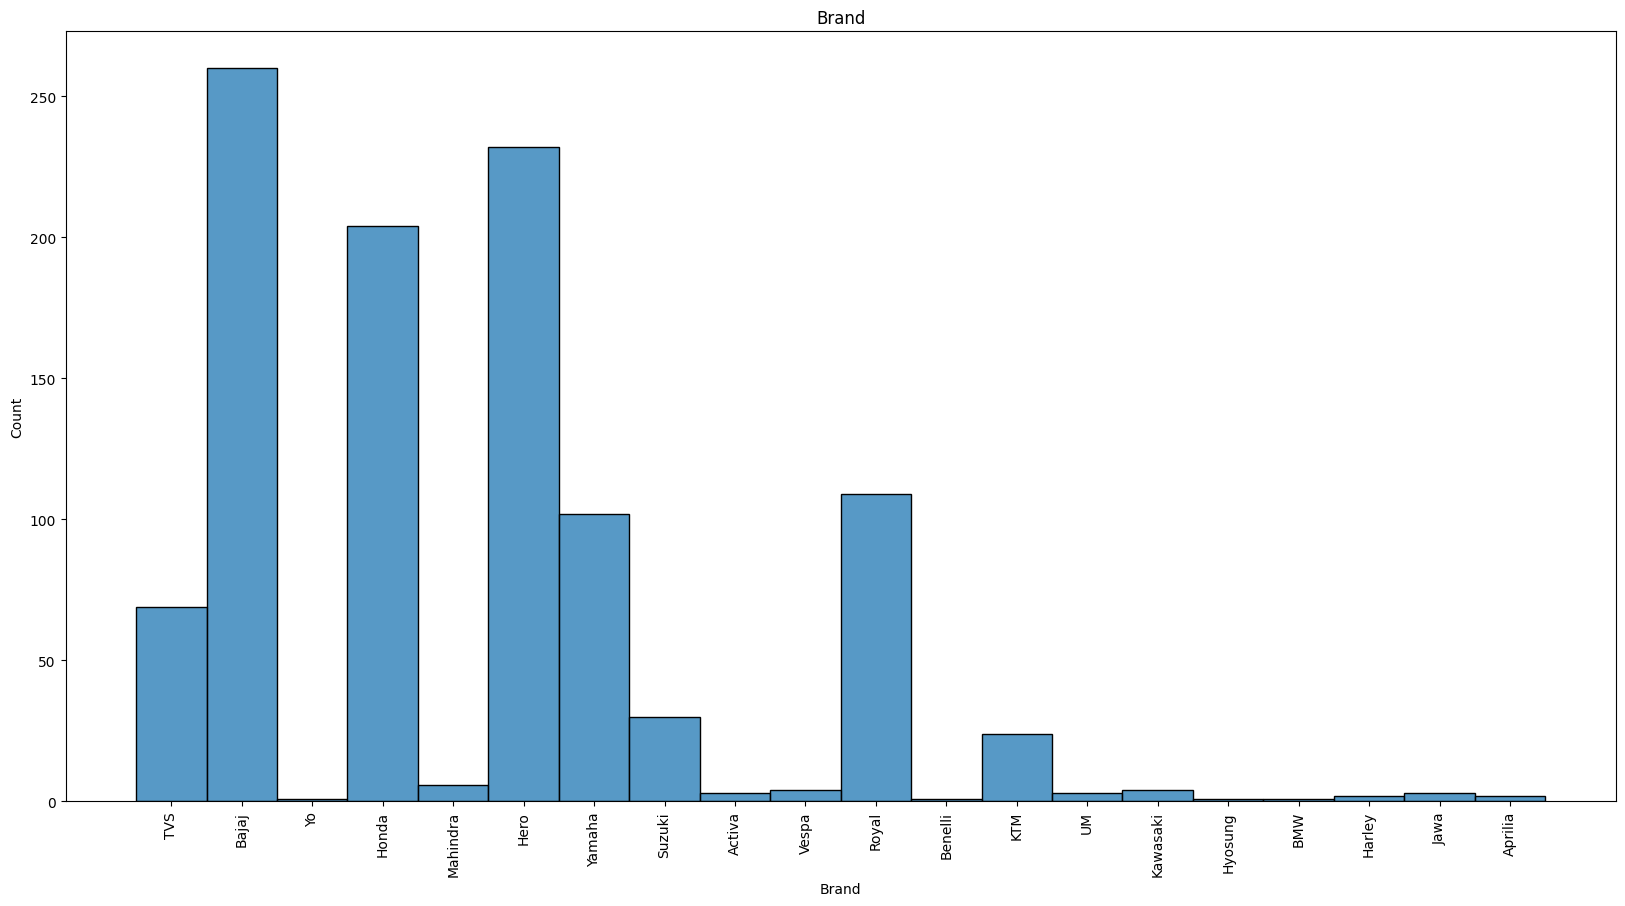

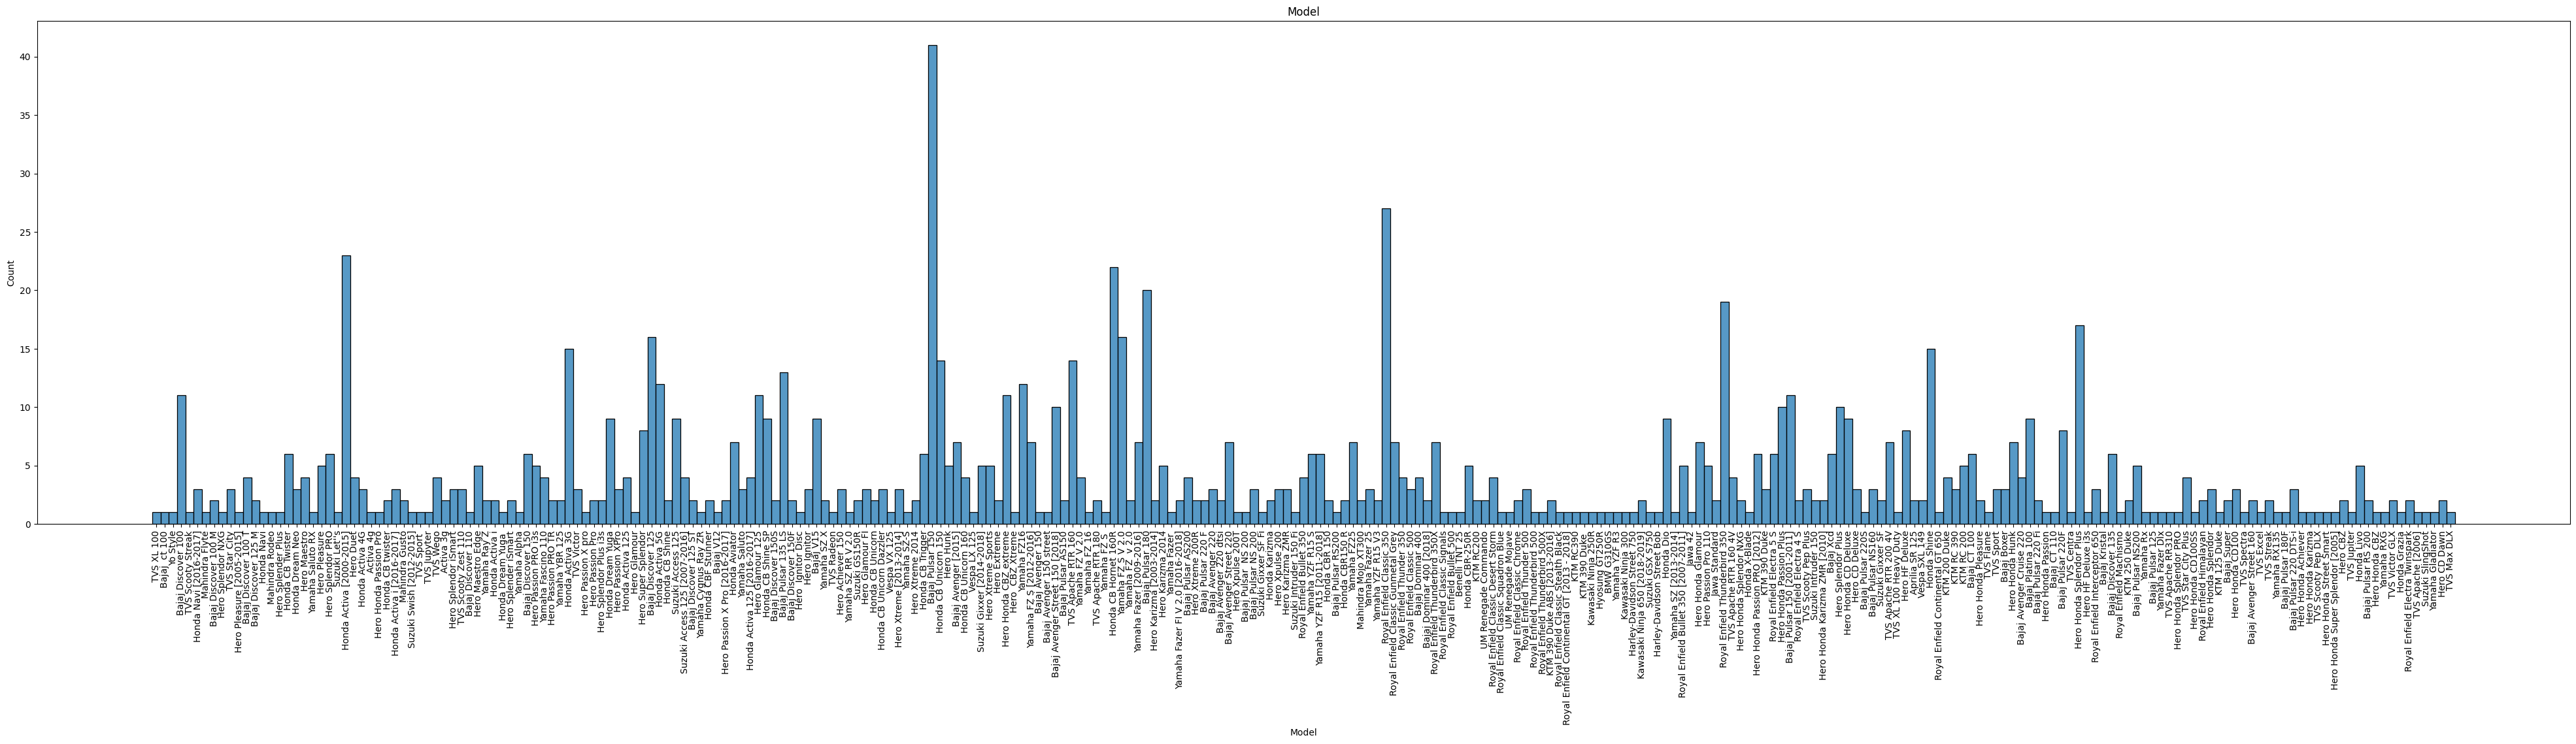

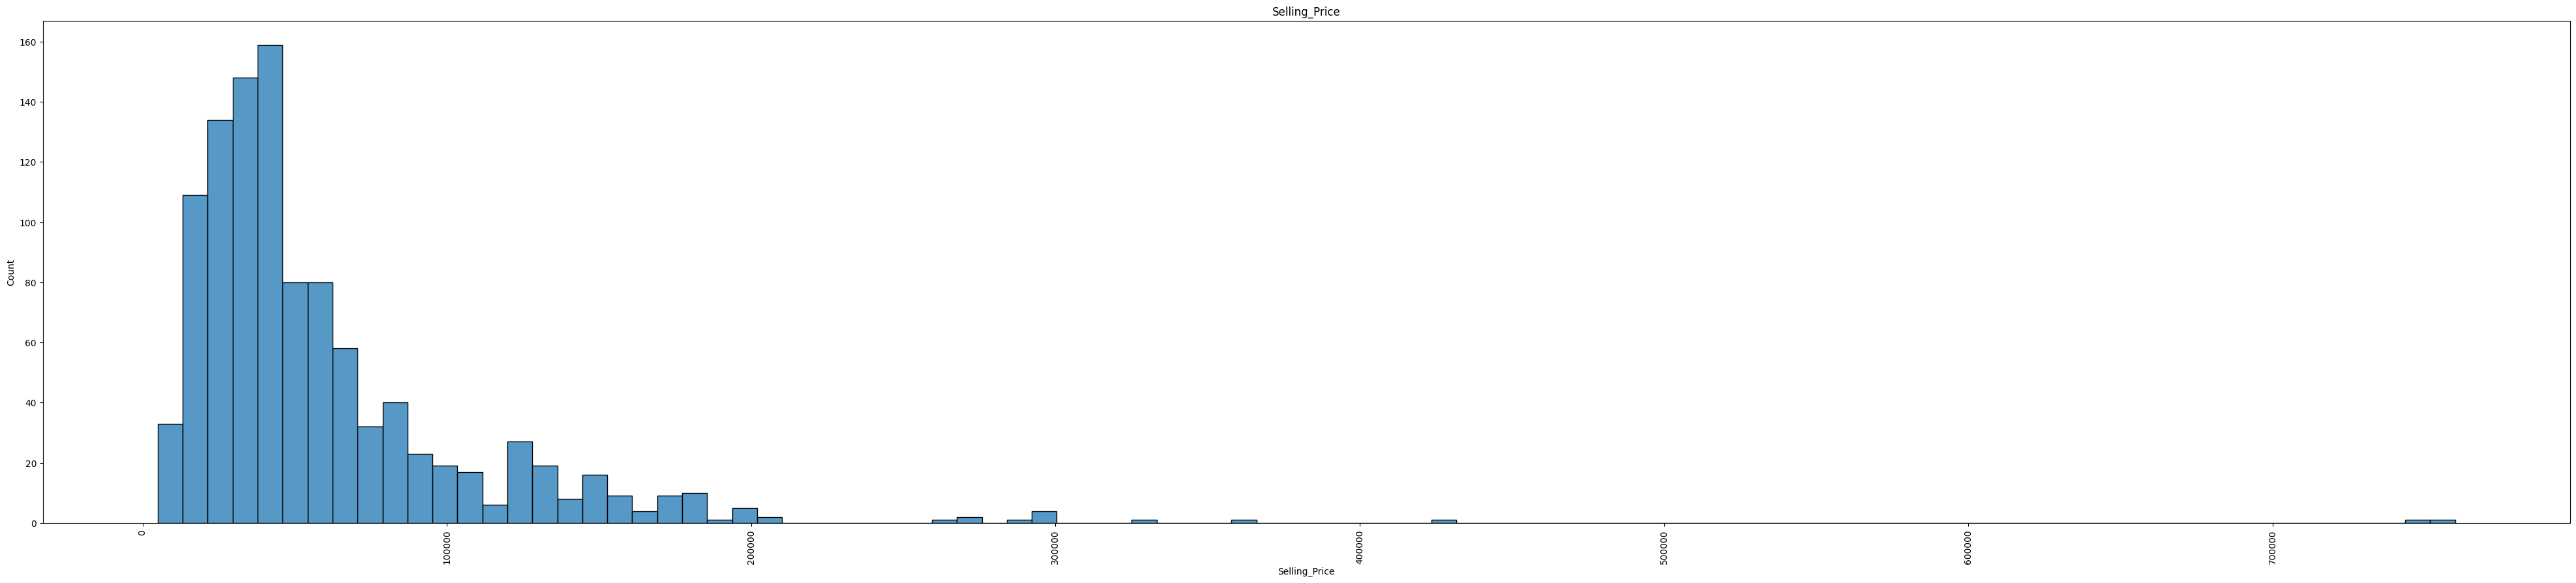

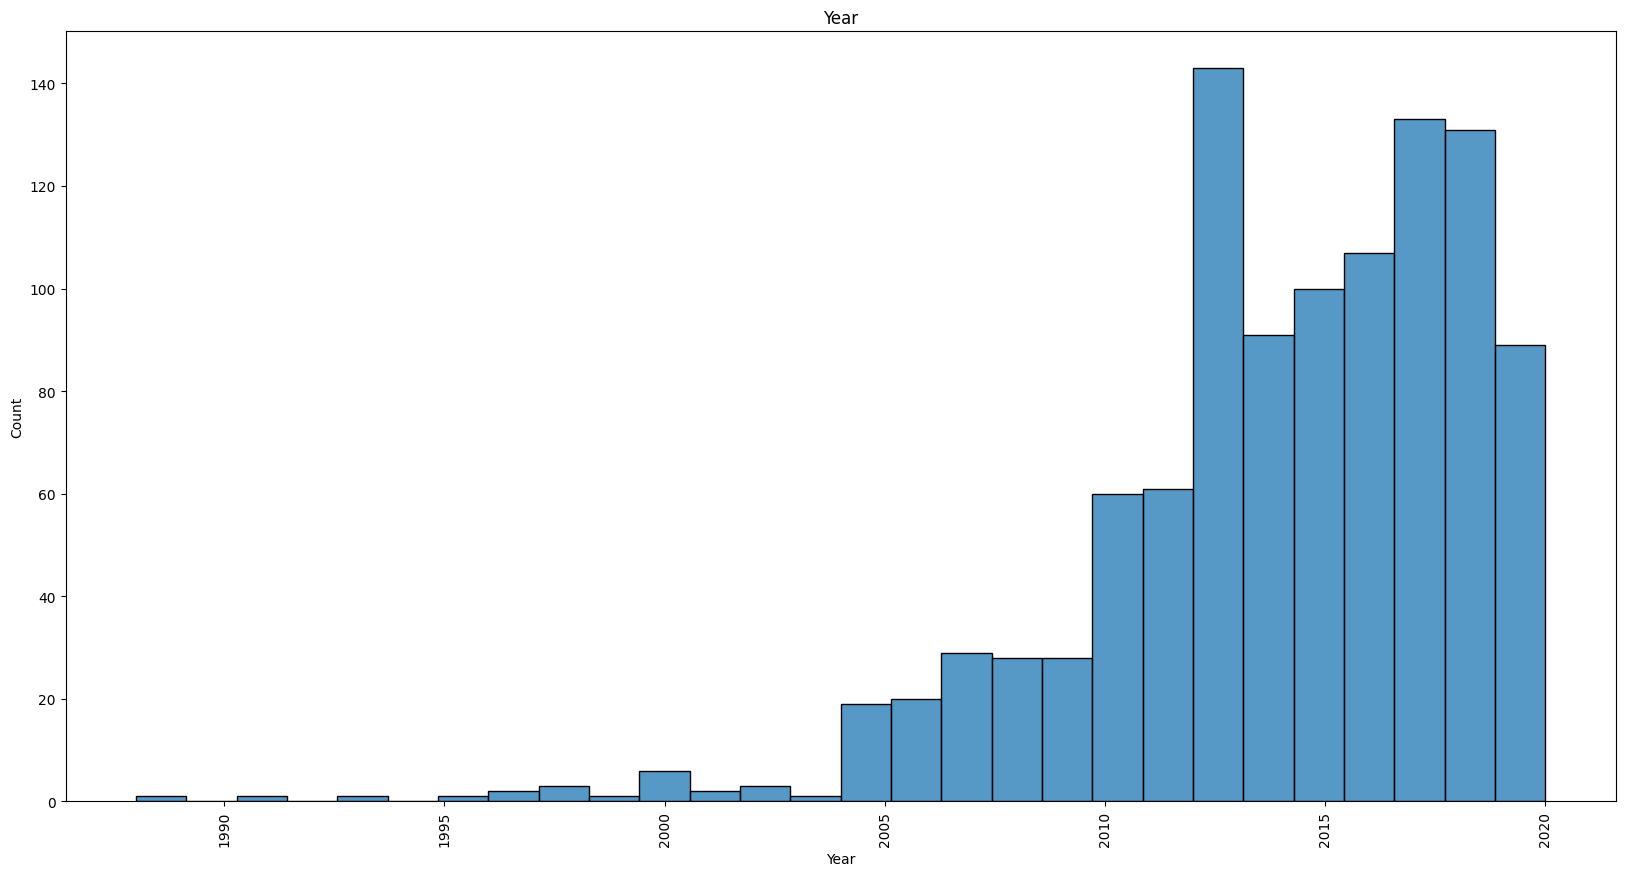

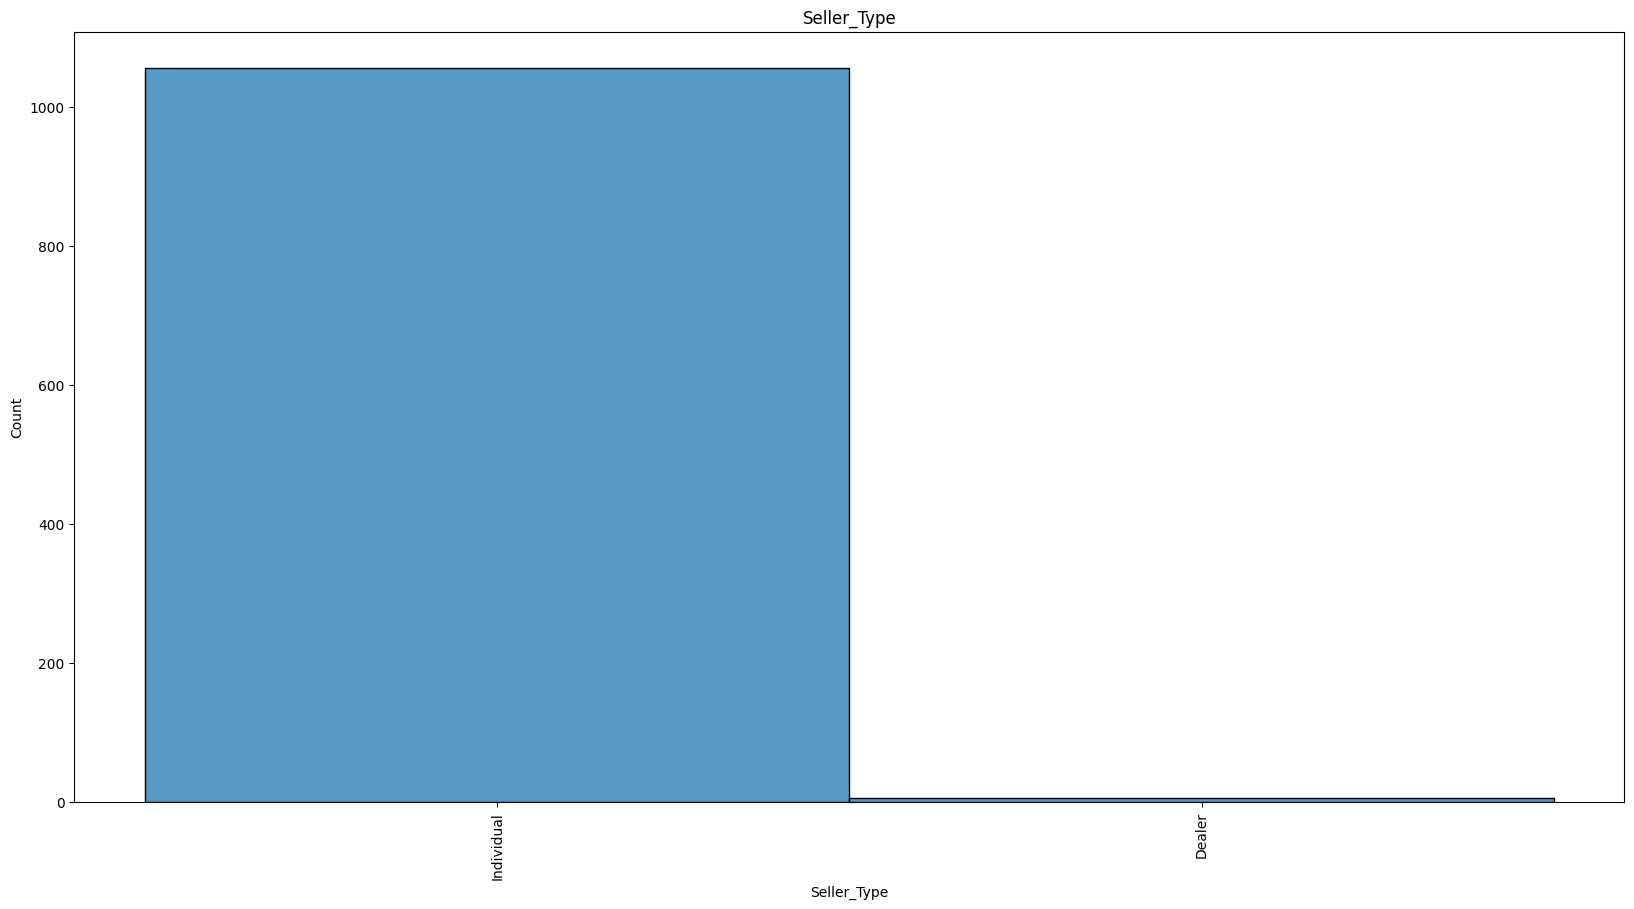

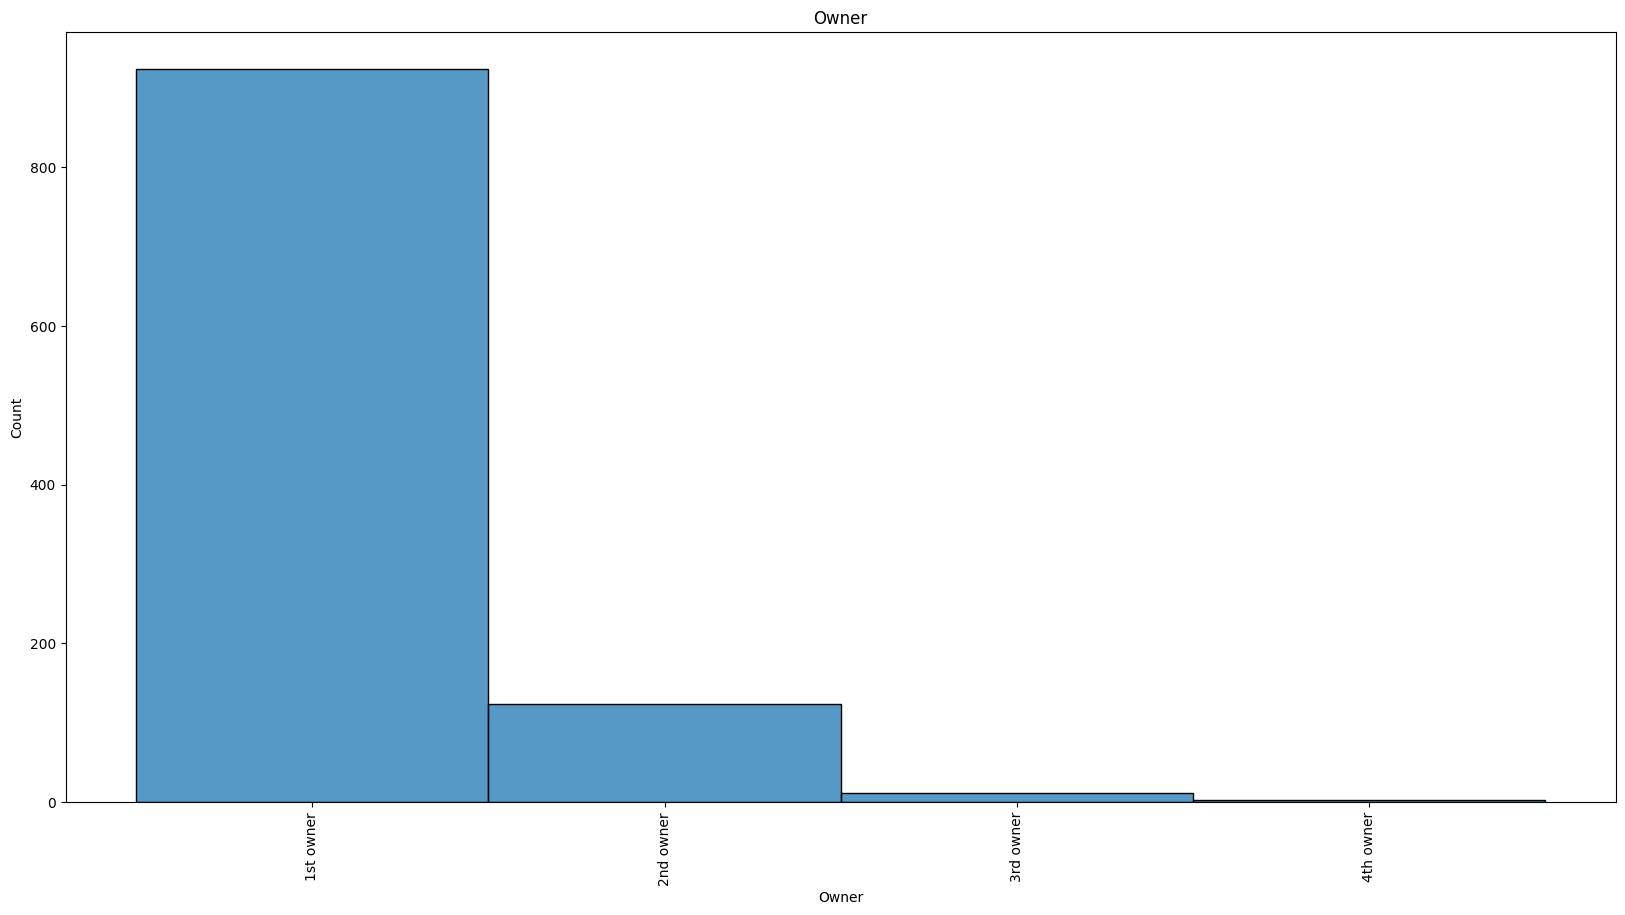

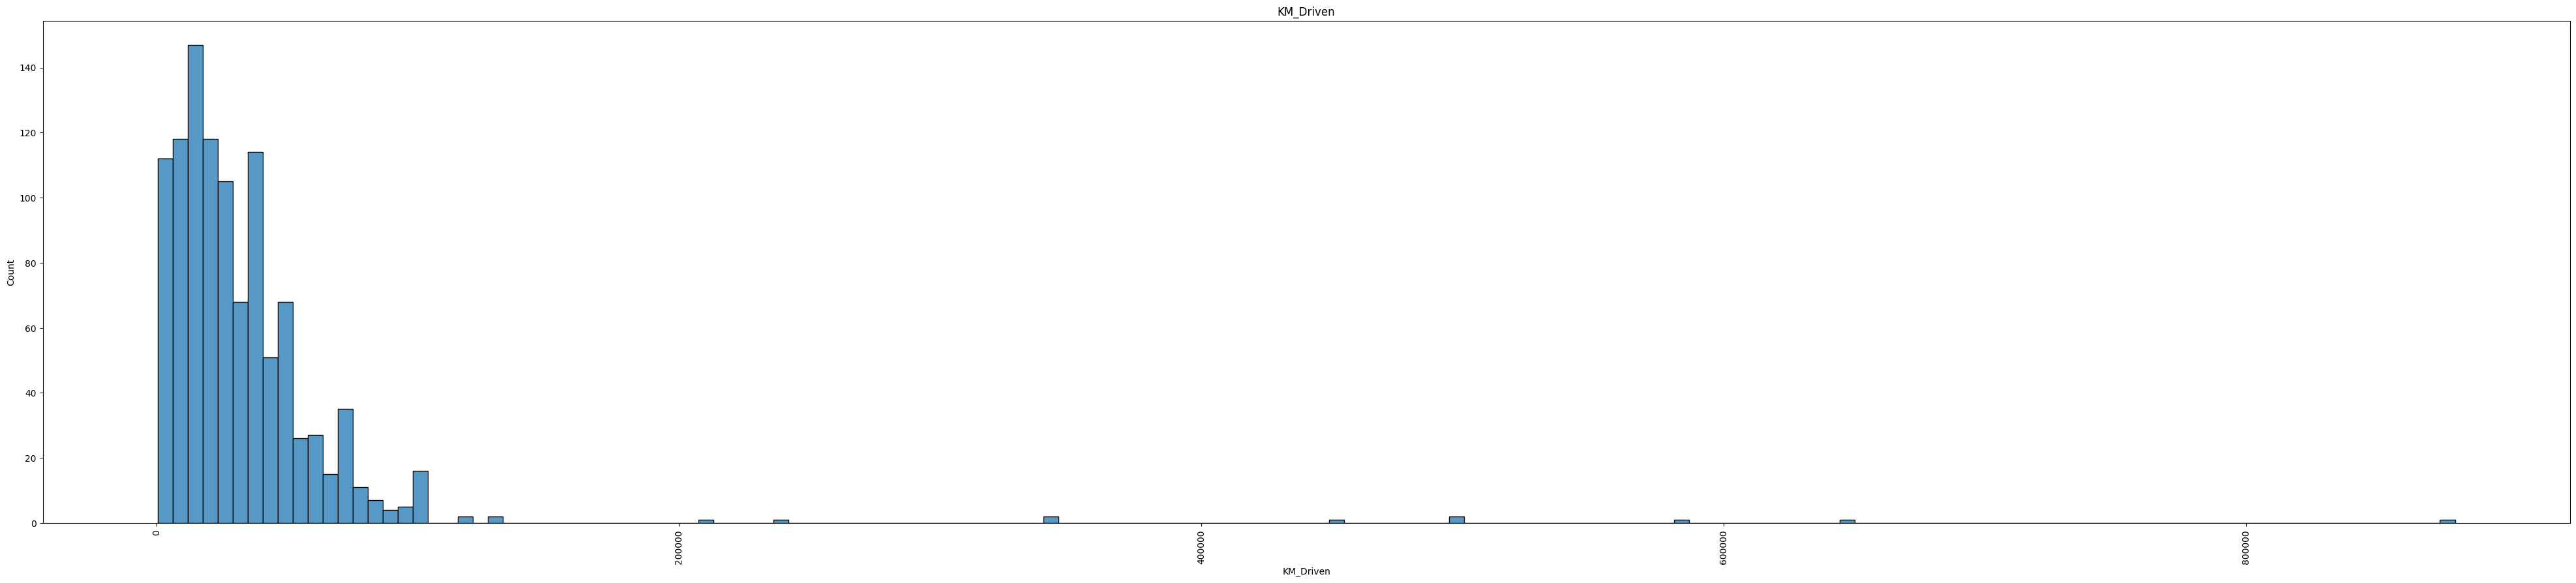

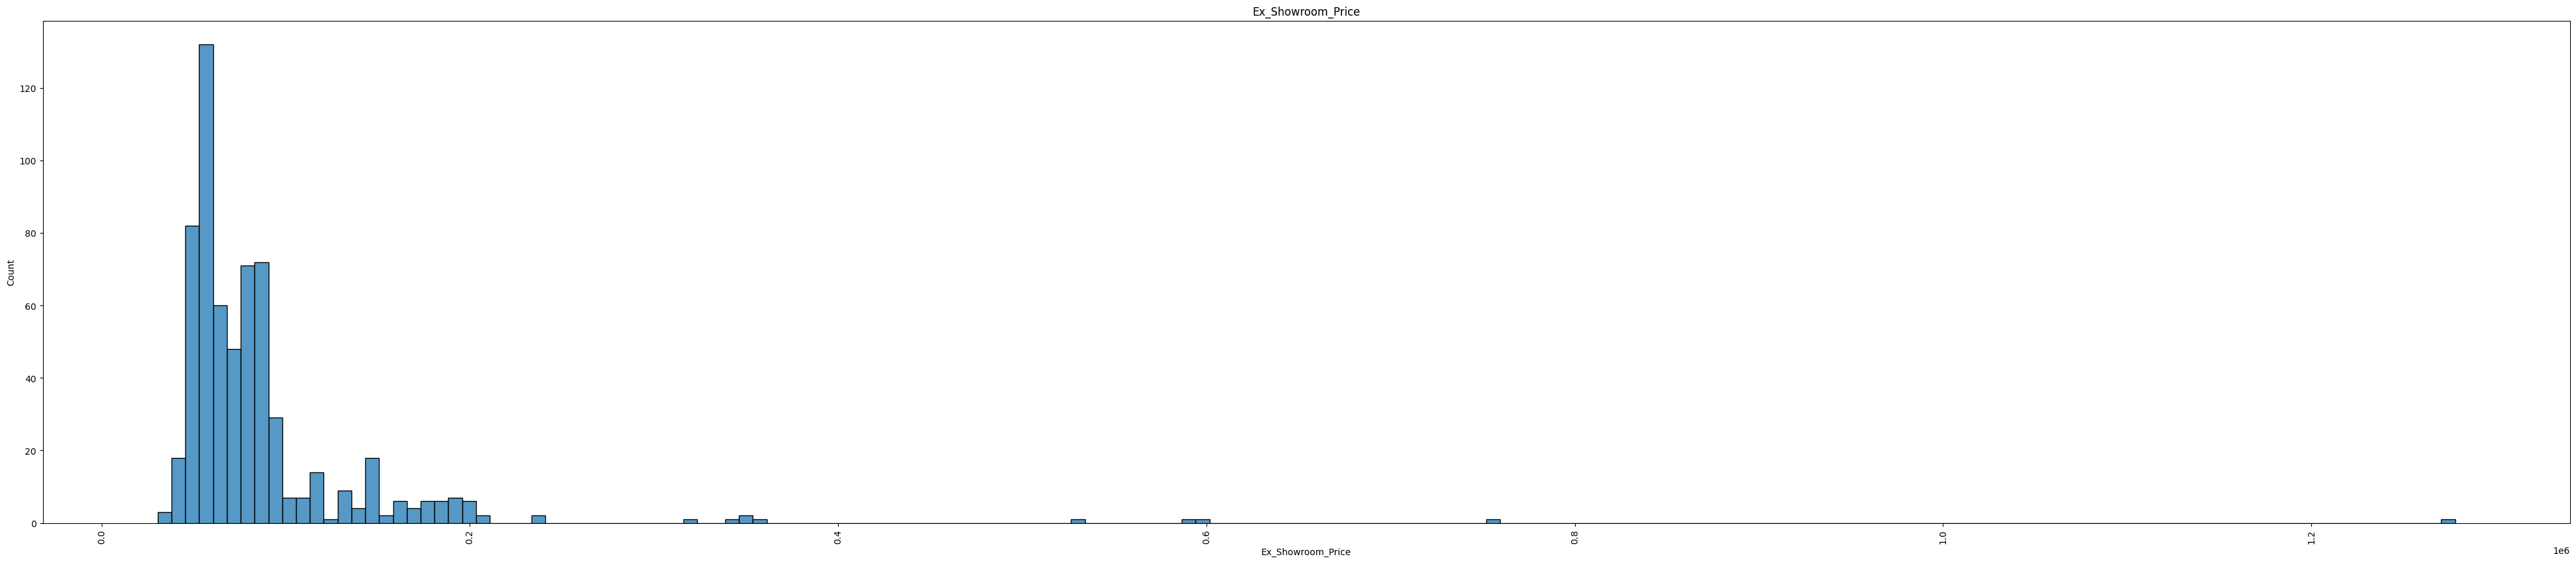

In [158]:
#Histograms
for col in df.columns:
    l = ['Model', 'Selling_Price', 'KM_Driven', 'Ex_Showroom_Price']
    if col in l:
        fig, ax = plt.subplots(figsize=(50, 10))
    else:
        fig, ax = plt.subplots(figsize=(20, 10))
    ax.tick_params(axis='x', rotation=90)
    plt.title(col)
    sns.histplot(data=df, x=col, ax=ax)
    plt.show()

In [159]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

<Axes: title={'center': 'Selling_Price'}, xlabel='Year'>

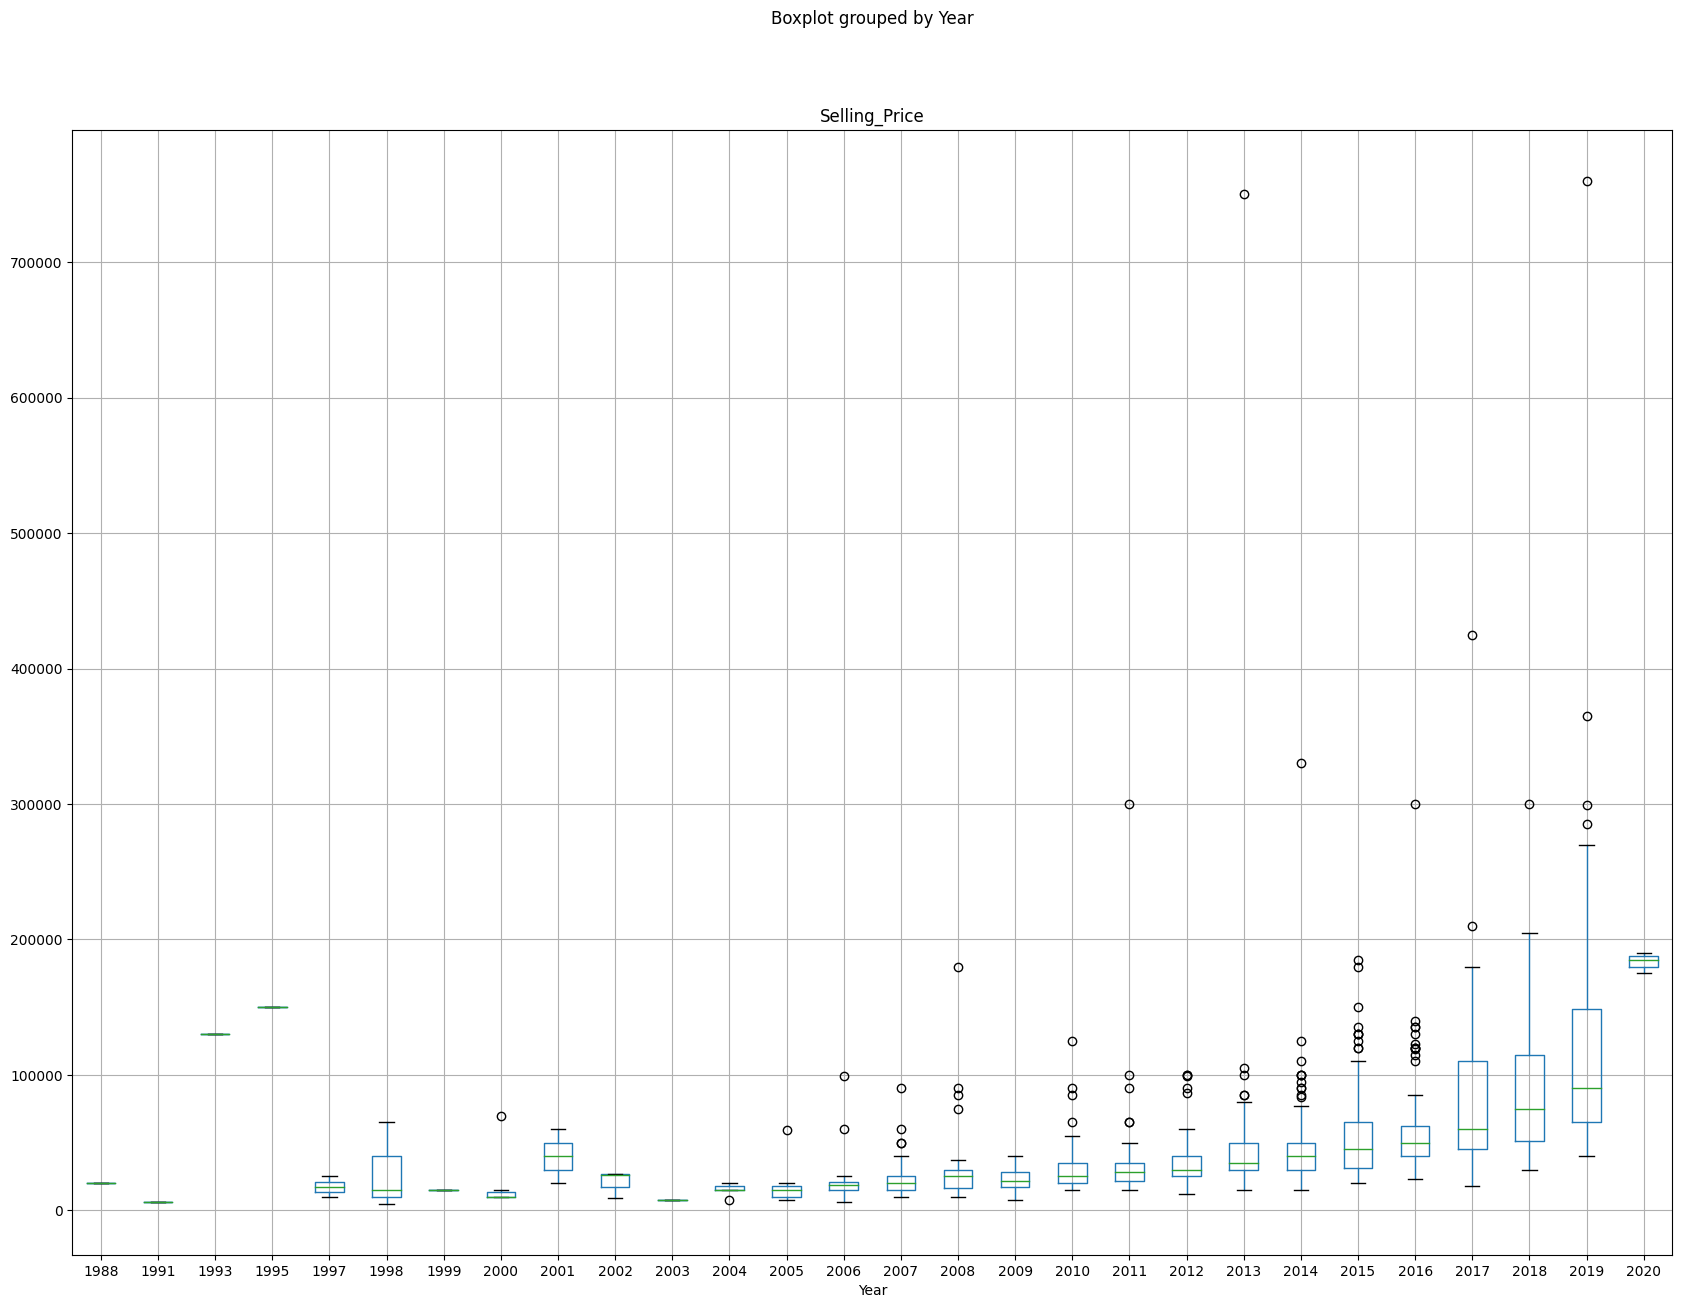

In [160]:
#boxplot
df.boxplot(column='Selling_Price', by='Year', figsize=(20, 15))

In [161]:
df.isna().sum()

Brand                  0
Model                  0
Selling_Price          0
Year                   0
Seller_Type            0
Owner                  0
KM_Driven              0
Ex_Showroom_Price    435
dtype: int64

In [162]:
df['Ex_Showroom_Price'].fillna(value = df['Ex_Showroom_Price'].mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  1061 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [163]:
df['check_price'] = np.where(df['Selling_Price'] < df['Ex_Showroom_Price'], 1, 0)
df

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,check_price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.000000,1
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.000000,1
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.000000,1
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.000000,1
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.000000,1
...,...,...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,87958.714058,0
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,87958.714058,1
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,87958.714058,1
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,87958.714058,1


In [164]:
LE = LabelEncoder()
df['Seller_Type'] = LE.fit_transform(df['Seller_Type'])
df['Owner'] = LE.fit_transform(df['Owner'])

In [165]:
x = df.loc[:, ['Year', 'Seller_Type', 'Owner', 'KM_Driven', 'Ex_Showroom_Price']]
y = df.loc[:, 'Selling_Price']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2529)
regression = LinearRegression()
model = regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

In [167]:
print('regression.coef_:',regression.coef_,'\n')
print('regression.intercept_:',regression.intercept_)

regression.coef_: [ 4.39189354e+03 -2.32412476e+03  1.02813853e+03 -4.90697572e-02
  7.44721096e-01] 

regression.intercept_: -8846505.277693039


In [168]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [170]:
score = r2_score(y_test, y_pred)
print('R2 Score:', score)
print('Accuracy:', score*100)


R2 Score: 0.7432321518609616
Accuracy: 74.32321518609616
